# Importing all the necessary modules

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import random

# Downloading the CIFAR10 dataset

## The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.




In [49]:
def download_CIFAR10_dataset():
    """Downloads the CIFAR-10 dataset in the data folder and returns training data and testing data."""
    train_data = datasets.CIFAR10(
        root = "data",
        download=True,
        train=True,
        transform=ToTensor()
    )
    validation_data = datasets.CIFAR10(
        root = "data",
        download=True,
        train=False,
        transform=ToTensor()
    ) 

    return train_data,validation_data

In [50]:
train_data, validation_data = download_CIFAR10_dataset()
print(train_data,validation_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


# Making DataLoader Wraper for train data to load data in batches

In [51]:
BATCH_SIZE = 9

train_data_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)

# Visualizing the CIFAR-10 dataset

In [52]:
dataiter = iter(train_data_loader)
inputs,labels = next(dataiter)

In [53]:
inputs.shape

torch.Size([9, 3, 32, 32])

In [54]:
images = inputs.numpy()

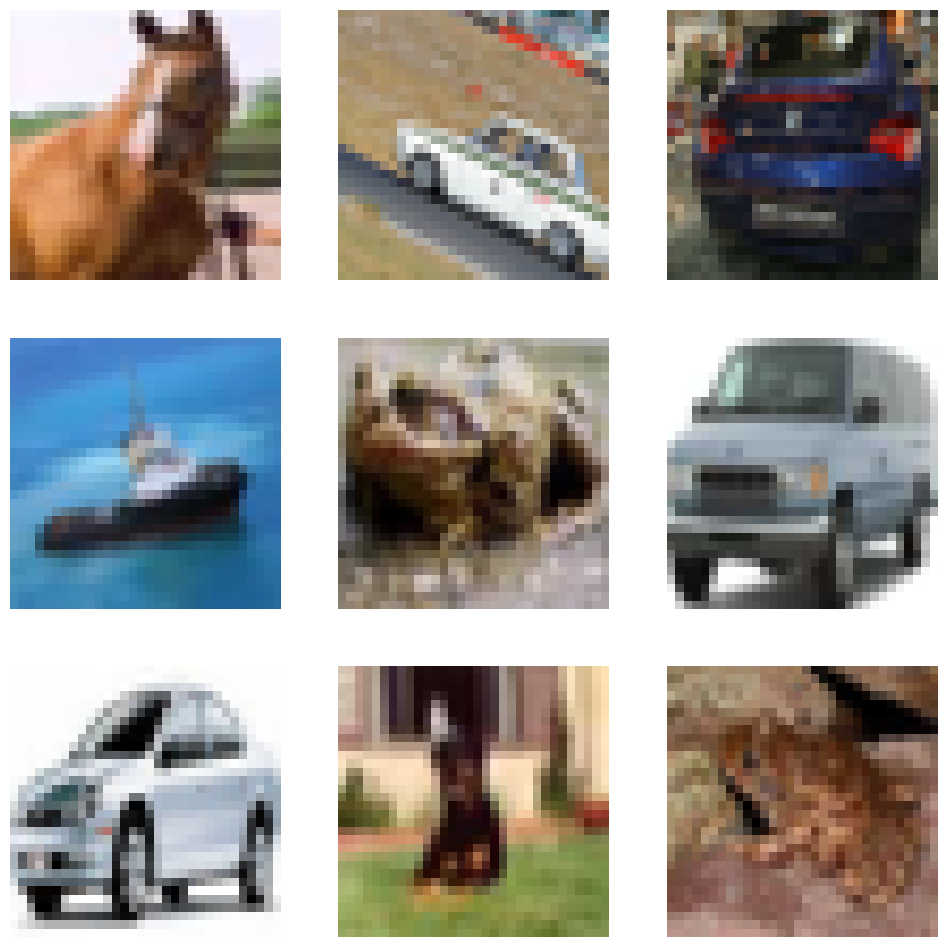

In [55]:
fig, axes = plt.subplots(3,3,figsize = (10,10))
fig.tight_layout()

for i in range(9):
    img = images[i]
    ax = axes[i//3,i%3]
    ax.imshow(np.transpose(img,(1,2,0)))
    ax.axis(False)
plt.show()

# Defining the Convolution model

In [56]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.flatten = nn.Flatten()
        self.dense_layers =  nn.Sequential(
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
        )

    def forward(self,inputs):
        x = self.conv_block1(inputs)
        x = self.conv_block2(x)
        x = self.flatten(x)
        x = self.dense_layers(x)
        return x

In [57]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [58]:
device

'cpu'

In [59]:
model = ConvNet().to(device)

# Selecting the loss function and optimizer and also setting the hyperparameters 

In [60]:
LEARNING_RATE = 0.01
BATCH_SIZE = 100
EPOCHS = 20

In [61]:
train_data_loader = DataLoader(train_data,batch_size=BATCH_SIZE)

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = LEARNING_RATE)

# Defining the Training Loop

In [63]:
def train_one_epoch(model,data_loader,loss_fn,optimizer,device):
    for inputs,targets in data_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        predictions = model(inputs)
        loss = loss_fn(predictions,targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Loss = { loss.item() }")

def train(model,data_loader,loss_fn,optimizer,device,epochs):
    for i in range(epochs):
        print(f"Epochs = {i+1}")
        train_one_epoch(model,data_loader,loss_fn,optimizer,device)
        print("------------------------------------------")
    print("Training completer")

# Training the model

In [64]:
train(model,train_data_loader,loss_fn,optimizer,device,epochs=EPOCHS)

Epochs = 1
Loss = 2.3001811504364014
------------------------------------------
Epochs = 2
Loss = 2.261455535888672
------------------------------------------
Epochs = 3
Loss = 2.223452568054199
------------------------------------------
Epochs = 4


KeyboardInterrupt: 

# Saving the trained Model

In [139]:
torch.save(model.state_dict(),"CONV_NET.pth")

# Making predictions with the model

In [65]:
class_mapping = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [66]:
loaded_model = ConvNet()

In [67]:
state_dict = torch.load("CONV_NET_v2.pth",map_location=torch.device('cpu'))
loaded_model.load_state_dict(state_dict)

<All keys matched successfully>

In [89]:
_,validation_data = download_CIFAR10_dataset()

In [90]:
rand_num = np.random.randint(0,10000-1)
print(rand_num)

9238


In [91]:
input, target = validation_data[rand_num][0], validation_data[rand_num][1]
print(input)
npimg = input.numpy()

tensor([[[0.4588, 0.4745, 0.4980,  ..., 0.5608, 0.5451, 0.5490],
         [0.4353, 0.4549, 0.4824,  ..., 0.5608, 0.5569, 0.5647],
         [0.4353, 0.4431, 0.4588,  ..., 0.5686, 0.5686, 0.5765],
         ...,
         [0.5843, 0.6039, 0.6235,  ..., 0.2980, 0.3059, 0.3020],
         [0.5725, 0.6000, 0.6078,  ..., 0.3098, 0.3059, 0.3059],
         [0.5569, 0.5490, 0.5098,  ..., 0.3490, 0.3333, 0.3333]],

        [[0.6196, 0.6275, 0.6471,  ..., 0.5451, 0.5294, 0.5294],
         [0.6039, 0.6196, 0.6392,  ..., 0.5373, 0.5373, 0.5412],
         [0.6118, 0.6118, 0.6235,  ..., 0.5373, 0.5373, 0.5490],
         ...,
         [0.5922, 0.5961, 0.6235,  ..., 0.3412, 0.3529, 0.3608],
         [0.5686, 0.5882, 0.5961,  ..., 0.3647, 0.3647, 0.3686],
         [0.5490, 0.5294, 0.4902,  ..., 0.4000, 0.3922, 0.3922]],

        [[0.7569, 0.7608, 0.7725,  ..., 0.5490, 0.5333, 0.5333],
         [0.7451, 0.7569, 0.7765,  ..., 0.5412, 0.5412, 0.5451],
         [0.7647, 0.7608, 0.7647,  ..., 0.5412, 0.5412, 0.

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

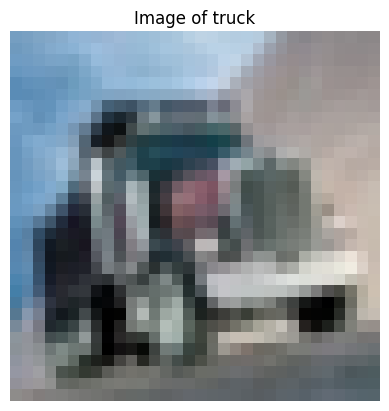

In [92]:
plt.imshow(np.transpose(npimg,(1,2,0)))
plt.title(f"Image of {class_mapping[target]}")
plt.axis(False)

In [93]:
def predict(model,input,target,class_mapping):
    model.eval()
    with torch.no_grad():
        predictions = model(input)
        predicted_index = predictions[0].argmax(0)
        predicted = class_mapping[predicted_index]
        expected = class_mapping[target]
    return predicted,expected

In [94]:
input = input.unsqueeze(0)

In [95]:
predicted,expected = predict(loaded_model,input,target,class_mapping)
print(f"Predicted: {predicted}, Expected: {expected}")

Predicted: truck, Expected: truck
